In [1]:
%matplotlib notebook
import numpy as np
import pandas
from sklearn import svm
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import speed_regression.training_data as td

Experiment 1: Train with 'walk' data, test on 'walk' data. Use raw data as feature

<IPython.core.display.Javascript object>


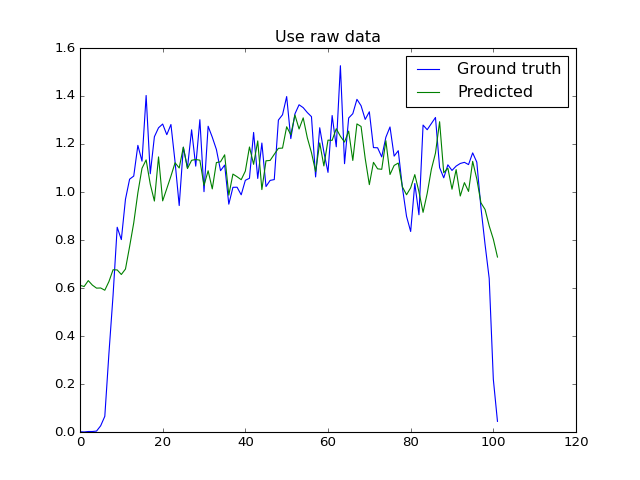

In [2]:
data_path = '../../data/20170118031852'
model_path = '../../data/model_walk.svm'
regressor = joblib.load(model_path)
data_valid_all = pandas.read_csv(data_path + '/processed/data.csv')
options = td.TrainingDataOption(sample_step=50)
data_factory = td.SpeedRegressionTrainData(options)

imu_columns = 'gyro_w,gyro_x,gyro_y,gyro_z,acce_x,acce_y,acce_z'.split(',')
features, targets = data_factory.CreateTrainingData(data_valid_all, imu_columns)

predicted = regressor.predict(features)
x = [i for i in range(predicted.shape[0])]
plt.plot(x, targets)
plt.plot(x, predicted)
plt.title('Use raw data')
plt.legend(['Ground truth', 'Predicted'])

/usr/local/lib/python3.5/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator SVR from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: The file '../../data/model_walk_fourier.svm' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


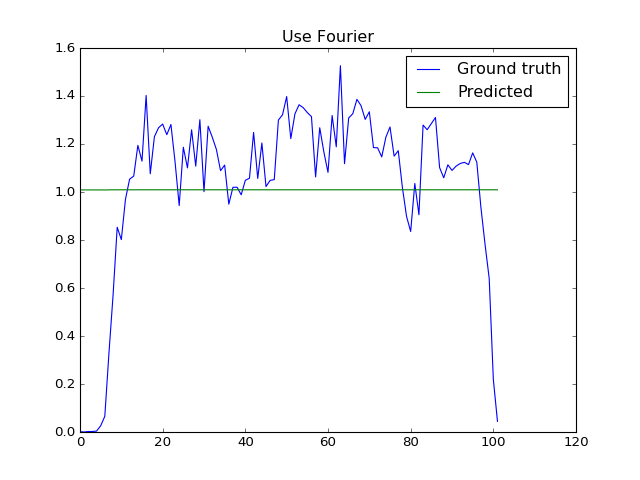

In [3]:
model_path_fourier = '../../data/model_walk_fourier.svm'
regressor_fourier = joblib.load(model_path_fourier)
options_fourier = td.TrainingDataOption(sample_step=50, feature='fourier')
data_factory_fourier = td.SpeedRegressionTrainData(options_fourier)

features_fourier, targets_fourier = data_factory_fourier.CreateTrainingData(data_valid_all, imu_columns)

predicted_fourier = regressor_fourier.predict(features_fourier)
x = [i for i in range(predicted_fourier.shape[0])]
plt.plot(x, targets_fourier)
plt.plot(x, predicted_fourier)
plt.title('Use Fourier')
plt.legend(['Ground truth', 'Predicted'])

<IPython.core.display.Javascript object>


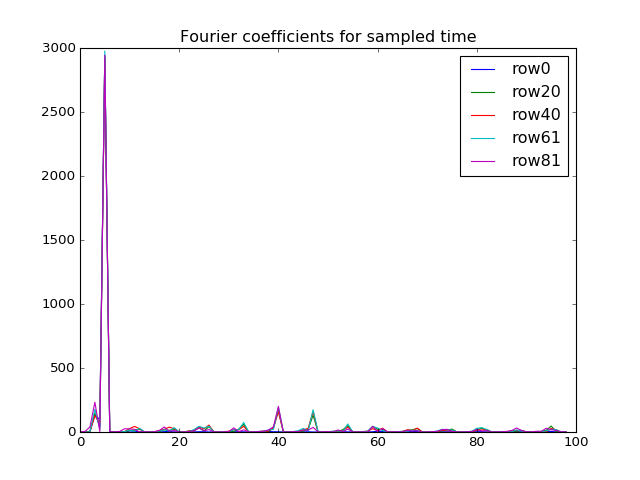

In [16]:
sample_rows = np.linspace(0, features_fourier.values.shape[0], 5, endpoint=False, dtype=int)
for row in sample_rows:
    plt.plot(features_fourier.values[row,1:100])
legends = ['row{:d}'.format(int(i)) for i in sample_rows]
plt.legend(legends)
plt.title('Fourier coefficients for sampled time')

The following experiments use gyroscope, linear acceleration and gravity as input